# Linear Regression on Premier League Players' Stats During 2018-2019 Season

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

## 2018-2019 Stats

In [2]:
premleague_df = pd.read_csv('premleague_1819_stats.csv', index_col='Unnamed: 0')

## Visualizing Data

In [3]:
premleague_df.corr()

,Age,MP,Starts,Min,Gls,Ast,CrdY,Shot,FK,TotPassCmp,Prog,Touches_Att3rd,DribSucc,DribPl,Rec
Age,1.000000,0.104375,0.139610,0.139232,0.027761,-0.009162,0.088697,-0.033206,-0.023386,0.087010,0.048199,-0.021592,-0.119317,-0.122522,0.056151
MP,0.104375,1.000000,0.927482,0.940394,0.468851,0.488331,0.548682,0.606711,0.272018,0.724725,0.637426,0.636031,0.544759,0.545524,0.771646
Starts,0.139610,0.927482,1.000000,0.996076,0.417577,0.441667,0.584740,0.529660,0.272925,0.789375,0.674011,0.576739,0.480053,0.479460,0.796683
Min,0.139232,0.940394,0.996076,1.000000,0.412228,0.439180,0.581444,0.524919,0.268309,0.790613,0.671616,0.572444,0.476873,0.476334,0.795816
Gls,0.027761,0.468851,0.417577,0.412228,1.000000,0.561515,0.187023,0.872030,0.333940,0.201918,0.285664,0.634683,0.603656,0.604734,0.388465
Ast,-0.009162,0.488331,0.441667,0.439180,0.561515,1.000000,0.229509,0.656261,0.426915,0.397771,0.579033,0.769493,0.589995,0.590882,0.524654
CrdY,0.088697,0.548682,0.584740,0.581444,0.187023,0.229509,1.000000,0.299097,0.220601,0.564290,0.570809,0.360055,0.292666,0.290139,0.554663
Shot,-0.033206,0.606711,0.529660,0.524919,0.872030,0.656261,0.299097,1.000000,0.446710,0.337846,0.434884,0.760551,0.706978,0.711289,0.532469
FK,-0.023386,0.272018,0.272925,0.268309,0.333940,0.426915,0.220601,0.446710,1.000000,0.281370,0.435367,0.443967,0.265598,0.268300,0.337256
TotPassCmp,0.087010,0.724725,0.789375,0.790613,0.201918,0.397771,0.564290,0.337846,0.281370,1.000000,0.839279,0.553661,0.356756,0.353594,0.965975


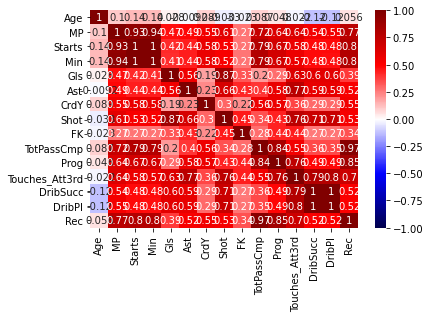

In [4]:
sns.heatmap(premleague_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1);

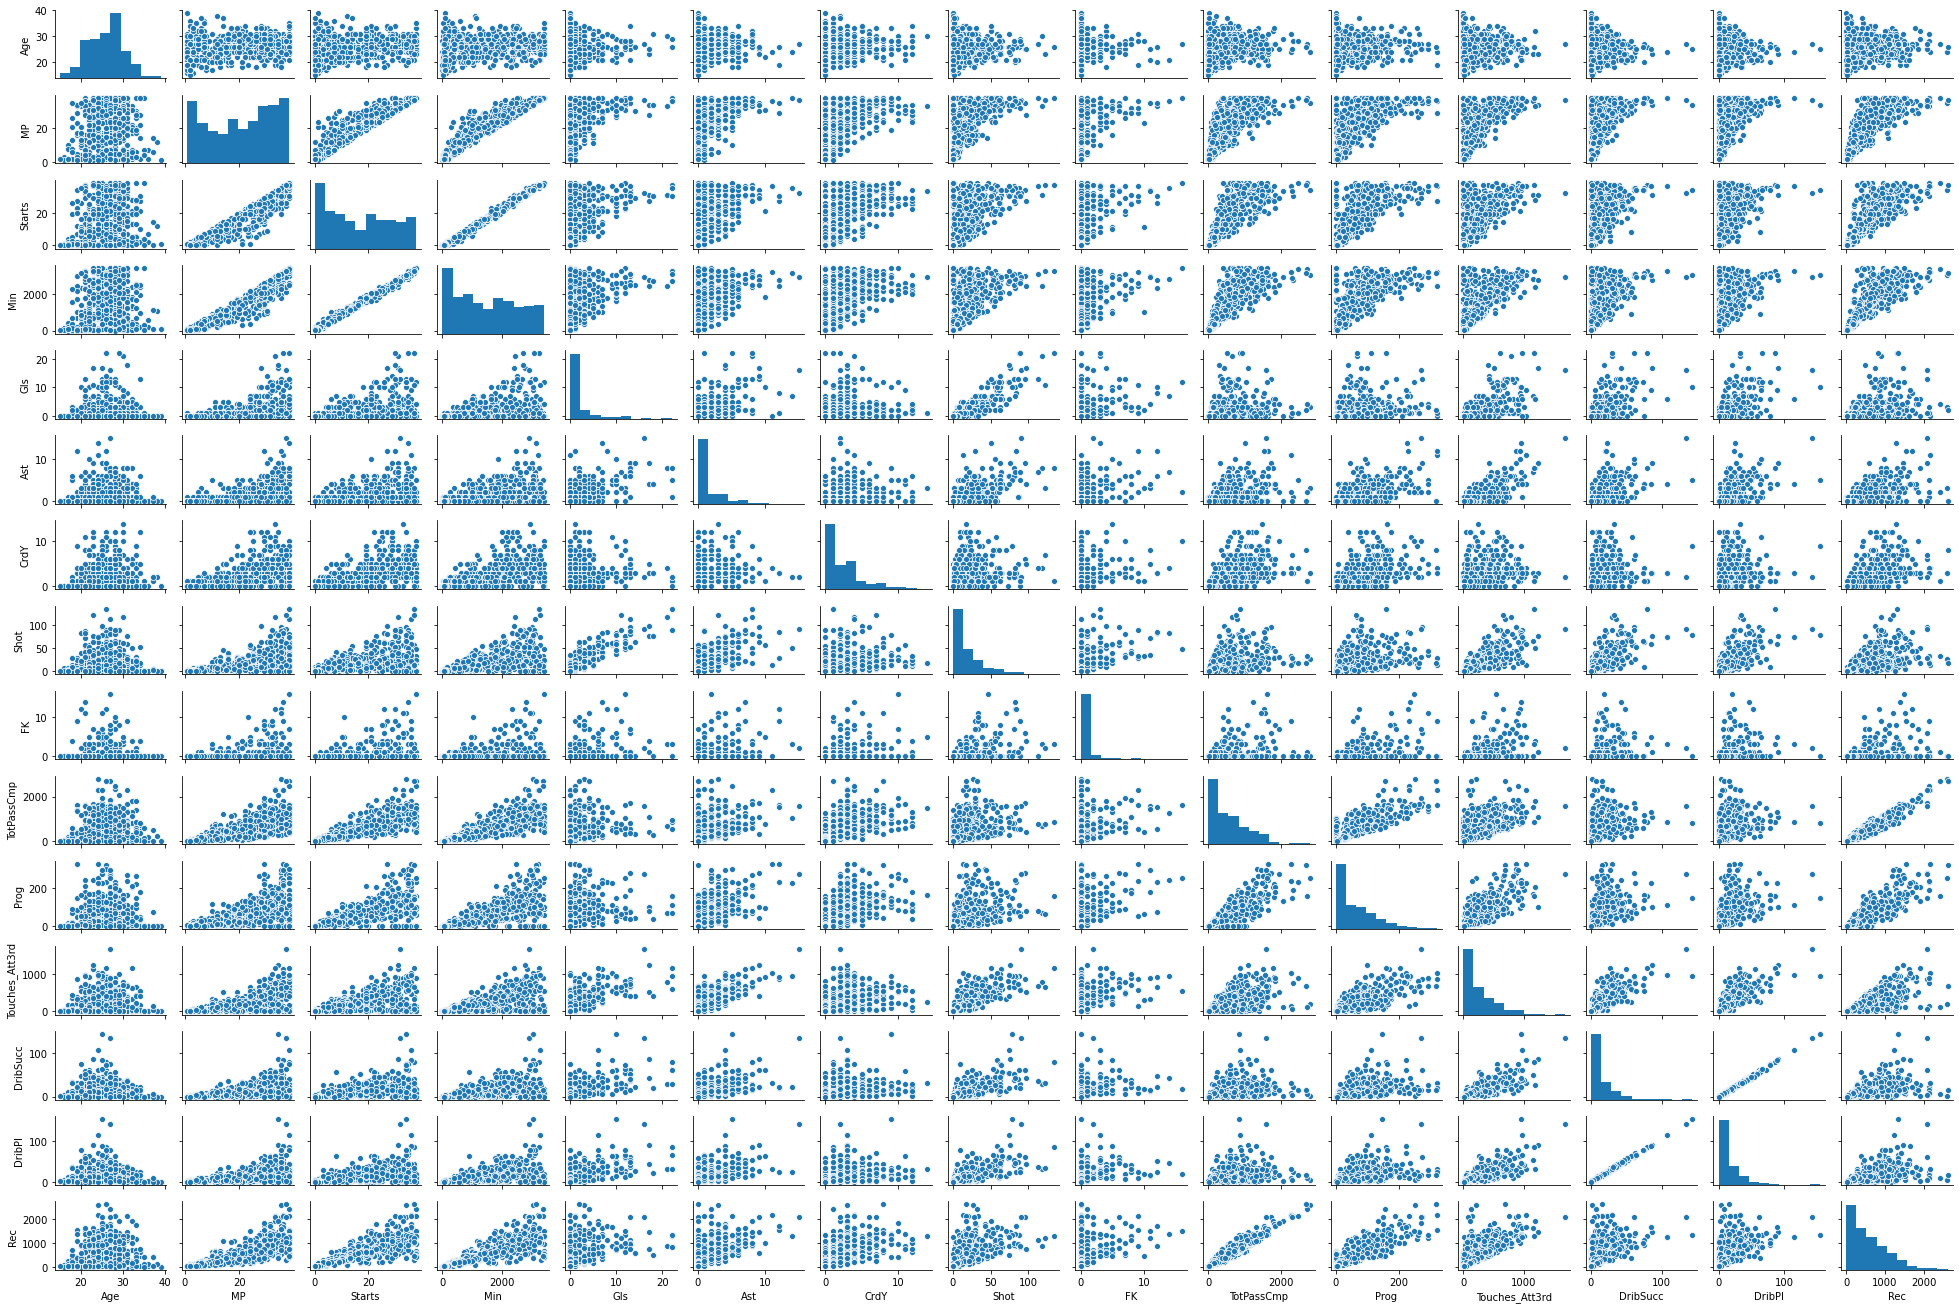

In [5]:
sns.pairplot(premleague_df, height=1.2, aspect=1.5);

In [7]:
# OLS with statsmodels
y, X = patsy.dmatrices('Gls ~ Age + Min + Ast + CrdY + Shot + FK + TotPassCmp + Prog + Touches_Att3rd + DribPl + Rec', data=premleague_df, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Gls   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     163.4
Date:                Sat, 11 Jul 2020   Prob (F-statistic):          5.10e-157
Time:                        20:42:58   Log-Likelihood:                -985.28
No. Observations:                 508   AIC:                             1995.
Df Residuals:                     496   BIC:                             2045.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.7600      0.499     -3.526      0.000      -2.741      -0.779
Age                0.0537      0.019      2.799      0.005       0.016       0.091
Min                0.0003      0.000      2.215      0.027    3.91e-05       0.001
Ast                0.0303      0.055      0.556      0.579      -0.077       0.138
CrdY              -0.0412      0.039     -1.067      0.287      -0.117       0.035
Shot               0.1267      0.009     14.458      0.000       0.109       0.144
FK                -0.0527      0.046     -1.139      0.255      -0.144       0.038
TotPassCmp        -0.0040      0.001     -2.971      0.003      -0.007      -0.001
Prog              -0.0044      0.003     -1.357      0.175      -0.011       0.002
Touches_Att3rd     0.0007      0.001      0.777      0.438      -0.001       0.002
DribPl            -0.0105      0.008     -1.398      0.163      -0.025       0.004
Rec                0.0038      0.001      2.711      0.007       0.001       0.007
==============================================================================
Omnibus:                      114.701   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              812.754
Skew:                           0.776   Prob(JB):                    3.26e-177
Kurtosis:                       8.999   Cond. No.                     1.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""